## Long Short-Term Memory 

In this assignment, we will learn about LSTM models. We will create an LSTM model for time series prediction.

In [1]:
import numpy as np
import os
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Below is a function for loading time series data collected by sensors. There are 9 different files, We have data about body acceleration, body gyro, and total acceleration for the x, y, and z axis

In [3]:
def load_func(path, file_ind=False):
    data_list = []
    if file_ind:
        filenames = [path]
    else:
        files = os.listdir(path)
        filenames = [path + '/' + f for f in files]
    for f in filenames:
        dataframe = pd.read_csv(f, header=None, delim_whitespace=True)
        data_list.append(dataframe.values)
    if len(data_list) > 1:
        return np.dstack(data_list)
    else:
        return data_list[0]

In [4]:
PATH = '/content/drive/MyDrive/Data/UCI HAR Dataset/'

In [5]:
os.listdir(f'{PATH}train/Inertial Signals')

['body_acc_y_train.txt',
 'body_gyro_z_train.txt',
 'body_gyro_x_train.txt',
 'body_acc_x_train.txt',
 'total_acc_z_train.txt',
 'body_acc_z_train.txt',
 'total_acc_x_train.txt',
 'body_gyro_y_train.txt',
 'total_acc_y_train.txt']

In [6]:
X_train = load_func(f'{PATH}train/Inertial Signals')
X_test = load_func(f'{PATH}test/Inertial Signals')
y_train_cat = load_func(f'{PATH}train/y_train.txt', True)
y_test_cat = load_func(f'{PATH}test/y_test.txt', True)

Print the dimensions of both the predictor variables and the target.

In [7]:
# Answer below:
print(f'X train shape: {X_train.shape}')
print(f'Y train shape: {y_train_cat.shape}')
print(f'X test shape: {X_test.shape}')
print(f'Y test shape: {y_test_cat.shape}')


X train shape: (7352, 128, 9)
Y train shape: (7352, 1)
X test shape: (2947, 128, 9)
Y test shape: (2947, 1)


In [8]:
X_train[:5]

array([[[ 1.076681e-02,  2.285864e-02,  3.019122e-02, ...,
          1.012817e+00,  6.601362e-02, -1.232167e-01],
        [ 6.579480e-03,  1.031572e-02,  4.371071e-02, ...,
          1.022833e+00,  4.269897e-02, -1.268756e-01],
        [ 8.928878e-03,  1.324969e-02,  3.568780e-02, ...,
          1.022028e+00,  7.485018e-02, -1.240037e-01],
        ...,
        [ 1.714439e-04, -2.170124e-03,  3.985177e-02, ...,
          1.018445e+00,  1.909445e-03, -1.240696e-01],
        [ 1.574181e-03, -5.642633e-03,  3.744932e-02, ...,
          1.019372e+00, -7.982483e-05, -1.227451e-01],
        [ 3.070189e-03, -1.446006e-03,  2.881781e-02, ...,
          1.021171e+00, -3.771800e-05, -1.213260e-01]],

       [[-4.687588e-03,  1.226815e-02,  1.711106e-02, ...,
          1.018851e+00,  6.122797e-03, -1.239760e-01],
        [-7.487894e-03,  1.614958e-02,  2.417851e-02, ...,
          1.022380e+00,  9.710357e-03, -1.268078e-01],
        [-8.429991e-03,  1.589471e-02,  3.022889e-02, ...,
          1.02

The target variable is categorical. One hot encode the target variable.

In [9]:
from sklearn.preprocessing import OneHotEncoder

#enc = OneHotEncoder(handle_unknown='ignore') 
#y_train = enc.fit_transform(y_train_cat).toarray() 
#y_test = enc.transform(y_test_cat).toarray()

y_train = to_categorical(y_train_cat - 1, 6)
y_test = to_categorical(y_test_cat - 1, 6)

y_train.shape

(7352, 6)

In [10]:
y_test.shape

(2947, 6)

Create a model containing an LSTM layer with unit size 100, and input shape that is the tuple containing the number of columns in X and the number of files in X.

The next layer is a dropout layer. Choose 0.5 for the proportion. Then add a dense layer of unit size 100 and finally an output dense layer. 

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# instantiate model
model = Sequential()
# LSTM layer
model.add(LSTM(100, input_shape=(X_train.shape[1],X_train.shape[2])))
# dropout layer
model.add(Dropout(0.5))
# dense layer
model.add(Dense(100, activation='relu'))
# dense output layer
model.add(Dense(y_train.shape[1], activation='softmax'))





Print the model summary to ensure you have the correct number of parameters.

In [12]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               44000     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 606       
Total params: 54,706
Trainable params: 54,706
Non-trainable params: 0
_________________________________________________________________


Compile and fit the model. Select the appropriate activation, loss, and optimizer.

Run the model for 10 epochs with a batch size of 80.

In [13]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=80)


Epoch 1/50
92/92 [==============================] - 5s 18ms/step - loss: 1.4159 - accuracy: 0.4044 - val_loss: 5.4999 - val_accuracy: 0.0210
Epoch 2/50
92/92 [==============================] - 1s 11ms/step - loss: 0.8844 - accuracy: 0.6211 - val_loss: 4.4800 - val_accuracy: 0.0495
Epoch 3/50
92/92 [==============================] - 1s 12ms/step - loss: 0.6650 - accuracy: 0.7008 - val_loss: 2.6475 - val_accuracy: 0.1130
Epoch 4/50
92/92 [==============================] - 1s 11ms/step - loss: 0.5979 - accuracy: 0.7593 - val_loss: 2.8829 - val_accuracy: 0.1731
Epoch 5/50
92/92 [==============================] - 1s 11ms/step - loss: 0.4207 - accuracy: 0.8482 - val_loss: 3.3052 - val_accuracy: 0.2402
Epoch 6/50
92/92 [==============================] - 1s 11ms/step - loss: 0.3163 - accuracy: 0.8930 - val_loss: 3.4408 - val_accuracy: 0.2464
Epoch 7/50
92/92 [==============================] - 1s 11ms/step - loss: 0.2537 - accuracy: 0.9188 - val_loss: 4.2167 - val_accuracy: 0.2576
Epoch 8/50
92

Print the confusion matrix for the test data.

In [14]:
#plot confustion matric helper function
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Given a scikit-learn confusion matrix (CM), make a nice plot.

    Arguments
    ---------
    cm:           Confusion matrix from sklearn.metrics.confusion_matrix

    target_names: Given classification classes, such as [0, 1, 2]
                  The class names, for example, ['high', 'medium', 'low']

    title:        The text to display at the top of the matrix

    cmap:         The gradient of the values displayed from matplotlib.pyplot.cm
                  See http://matplotlib.org/examples/color/colormaps_reference.html
                  `plt.get_cmap('jet')` or `plt.cm.Blues`

    normalize:    If `False`, plot the raw numbers
                  If `True`, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # Confusion matrix created by
                                                              # `sklearn.metrics.confusion_matrix`
                          normalize    = True,                # Show proportions
                          target_names = y_labels_vals,       # List of names of the classes
                          title        = best_estimator_name) # Title of graph

    Citation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


In [15]:
y_test_pred = np.argmax(model.predict(X_test), axis=-1)
y_test_pred

array([2, 2, 2, ..., 1, 1, 1])

In [16]:
y_test_pred[1]

2

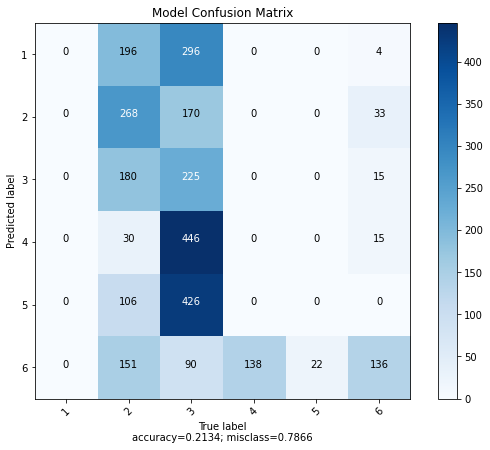

In [18]:
from sklearn.metrics import  classification_report, confusion_matrix

# plot model confusion matrix
confusion = confusion_matrix(y_test_cat-1, y_test_pred)
plot_confusion_matrix(cm=confusion, target_names=[1,2,3,4,5,6],title = 'Model Confusion Matrix',normalize=False)


In [20]:
# model classifcation report
print(classification_report(y_test_cat-1, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       496
           1       0.29      0.57      0.38       471
           2       0.14      0.54      0.22       420
           3       0.00      0.00      0.00       491
           4       0.00      0.00      0.00       532
           5       0.67      0.25      0.37       537

    accuracy                           0.21      2947
   macro avg       0.18      0.23      0.16      2947
weighted avg       0.19      0.21      0.16      2947



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The data appears corrupted. I have reloaded it and the accuracy is still poor. I should be seeing accuracy in the 80-90% range. 